https://en.comparis.ch/carfinder/marktplatz/occasion

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('comparis_car_listings_final.csv')

In [3]:
df

,Model,Price,Year,Mileage,Fuel Type
0,Honda FR-V FR-V 2.2 i-CTDi Comfort,"CHF 1,500",11.2008,"275,000 km",Diesel
1,Toyota RAV-4 RAV-4 2.2D-4 D CleanPower Linea Luna,"CHF 2,500",12.2006,"291,000 km",Diesel
2,BMW 320 320d xDrive 48V Touring M Sport Steptr...,"CHF 34,900",3.2021,"43,000 km",Diesel/Electric
3,Audi S3 S3 Sportback 2.0 TFSI quattro,"CHF 16,960",8.2014,"181,500 km",Petrol
4,VW Polo Polo 75,"CHF 1,500",1.1998,"95,900 km",Petrol
...,...,...,...,...,...
804,Mercedes-Benz C 250 C 250 AMG Line 7G-Tronic,"CHF 25,800",7.2015,"43,000 km",Petrol
805,Lexus LS LS 430 Automatic,"CHF 22,900",8.2005,"85,900 km",Petrol
806,Audi SQ5 SQ5 3.0 TDI quattro tiptronic,"CHF 27,700",6.2016,"162,000 km",Diesel
807,Seat Leon Leon 1.4 TSI FR,"CHF 7,900",3.2014,"172,700 km",Petrol


In [4]:
# Step 1: Remove 'CHF' and commas from Price column, then convert to integer
df["Price"] = df["Price"].str.replace("CHF", "").str.replace(",", "").astype(int)

# Step 2: Remove period and numbers before it in Year, then convert to integer
df["Year"] = df["Year"].astype(str).str.split('.').str[-1].astype(int)

# Step 3: Clean Mileage column
# Check for non-numeric values in Mileage column
non_numeric_mileage = df[~df["Mileage"].str.replace(" km", "").str.replace(",", "").str.isnumeric()]
print("Non-numeric Mileage entries:\n", non_numeric_mileage)

# Assuming non-numeric values are errors, replace them with NaN
df["Mileage"] = df["Mileage"].str.replace(" km", "").str.replace(",", "")
df["Mileage"] = pd.to_numeric(df["Mileage"], errors='coerce')  # This converts invalid entries to NaN

# Optionally, fill NaN with 0 or another strategy, like mean or median
df["Mileage"].fillna(0, inplace=True)  # Example: filling with 0

# Step 4: Extract the Make column as the first word in Model
df["Make"] = df["Model"].str.split().str[0]

# Ensure Fuel Type is a string
df["Fuel Type"] = df["Fuel Type"].astype(str)


Non-numeric Mileage entries:
                                 Model  Price  Year    Mileage  Fuel Type
175    Ford Focus Focus 1.6i 16V Vita   3000  2002     Manual  1227 (GE)
407  Renault Clio Clio 1.6 E-Tech Zen  16400  2021  Automatic  9437 (SG)


In [5]:
df

,Model,Price,Year,Mileage,Fuel Type,Make
0,Honda FR-V FR-V 2.2 i-CTDi Comfort,1500,2008,275000.0,Diesel,Honda
1,Toyota RAV-4 RAV-4 2.2D-4 D CleanPower Linea Luna,2500,2006,291000.0,Diesel,Toyota
2,BMW 320 320d xDrive 48V Touring M Sport Steptr...,34900,2021,43000.0,Diesel/Electric,BMW
3,Audi S3 S3 Sportback 2.0 TFSI quattro,16960,2014,181500.0,Petrol,Audi
4,VW Polo Polo 75,1500,1998,95900.0,Petrol,VW
...,...,...,...,...,...,...
804,Mercedes-Benz C 250 C 250 AMG Line 7G-Tronic,25800,2015,43000.0,Petrol,Mercedes-Benz
805,Lexus LS LS 430 Automatic,22900,2005,85900.0,Petrol,Lexus
806,Audi SQ5 SQ5 3.0 TDI quattro tiptronic,27700,2016,162000.0,Diesel,Audi
807,Seat Leon Leon 1.4 TSI FR,7900,2014,172700.0,Petrol,Seat


In [6]:
df["Fuel Type"] = df["Fuel Type"].astype(str)
df["Make"] = df["Make"].astype(str)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809 entries, 0 to 808
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Model      809 non-null    object 
 1   Price      809 non-null    int64  
 2   Year       809 non-null    int64  
 3   Mileage    809 non-null    float64
 4   Fuel Type  809 non-null    object 
 5   Make       809 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 38.0+ KB


In [8]:
df

,Model,Price,Year,Mileage,Fuel Type,Make
0,Honda FR-V FR-V 2.2 i-CTDi Comfort,1500,2008,275000.0,Diesel,Honda
1,Toyota RAV-4 RAV-4 2.2D-4 D CleanPower Linea Luna,2500,2006,291000.0,Diesel,Toyota
2,BMW 320 320d xDrive 48V Touring M Sport Steptr...,34900,2021,43000.0,Diesel/Electric,BMW
3,Audi S3 S3 Sportback 2.0 TFSI quattro,16960,2014,181500.0,Petrol,Audi
4,VW Polo Polo 75,1500,1998,95900.0,Petrol,VW
...,...,...,...,...,...,...
804,Mercedes-Benz C 250 C 250 AMG Line 7G-Tronic,25800,2015,43000.0,Petrol,Mercedes-Benz
805,Lexus LS LS 430 Automatic,22900,2005,85900.0,Petrol,Lexus
806,Audi SQ5 SQ5 3.0 TDI quattro tiptronic,27700,2016,162000.0,Diesel,Audi
807,Seat Leon Leon 1.4 TSI FR,7900,2014,172700.0,Petrol,Seat


In [9]:
df["Model"] = df["Model"].apply(lambda x: ' '.join(x.split()[1:]))  # Removes the first word
df["Model"] = df["Model"].apply(lambda x: ' '.join(dict.fromkeys(x.split())))  # Removes duplicate phrases


In [10]:
df

,Model,Price,Year,Mileage,Fuel Type,Make
0,FR-V 2.2 i-CTDi Comfort,1500,2008,275000.0,Diesel,Honda
1,RAV-4 2.2D-4 D CleanPower Linea Luna,2500,2006,291000.0,Diesel,Toyota
2,320 320d xDrive 48V Touring M Sport Steptronic,34900,2021,43000.0,Diesel/Electric,BMW
3,S3 Sportback 2.0 TFSI quattro,16960,2014,181500.0,Petrol,Audi
4,Polo 75,1500,1998,95900.0,Petrol,VW
...,...,...,...,...,...,...
804,C 250 AMG Line 7G-Tronic,25800,2015,43000.0,Petrol,Mercedes-Benz
805,LS 430 Automatic,22900,2005,85900.0,Petrol,Lexus
806,SQ5 3.0 TDI quattro tiptronic,27700,2016,162000.0,Diesel,Audi
807,Leon 1.4 TSI FR,7900,2014,172700.0,Petrol,Seat


In [12]:
df['Make'].nunique()

49

In [13]:
df['Fuel Type'].nunique()

15

In [14]:
df['Model'].nunique()

746

In [17]:
df.describe()

,Price,Year,Mileage
count,809.000000,809.000000,809.000000
mean,24147.475896,1790.776267,104073.181706
std,37041.123338,599.581022,76979.874815
min,1.000000,2.000000,0.000000
25%,5999.000000,2009.000000,44300.000000
50%,15900.000000,2016.000000,90000.000000
75%,29900.000000,2021.000000,151220.000000
max,595000.000000,2024.000000,550000.000000


In [18]:
# Count the number of Mileage values that are less than 1
mileage_less_than_one = df[df["Mileage"] < 1].shape[0]
print("Number of Mileage values less than 1:", mileage_less_than_one)


Number of Mileage values less than 1: 2


In [20]:
# Count the number of Mileage values that are less than 1
year_less_than_80s = df[df["Year"] < 1900].shape[0]
print("Number of Years values less than 1900:", year_less_than_80s)


Number of Years values less than 1900: 100


In [22]:
# Count the number of Mileage values that are less than 1
price_less_than_hund = df[df["Price"] < 100].shape[0]
print("Number of Prices values less than 100:", price_less_than_hund)


Number of Prices values less than 100: 36


In [23]:
df = df[df["Price"] >= 100].reset_index(drop=True)
df = df[df["Year"] >= 1900].reset_index(drop=True)
df = df[df["Mileage"] >= 1].reset_index(drop=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679 entries, 0 to 678
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Model      679 non-null    object 
 1   Price      679 non-null    int64  
 2   Year       679 non-null    int64  
 3   Mileage    679 non-null    float64
 4   Fuel Type  679 non-null    object 
 5   Make       679 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 32.0+ KB


In [25]:
df.describe()

,Price,Year,Mileage
count,679.000000,679.000000,679.000000
mean,25717.764359,2015.614138,105410.989691
std,39217.344088,6.691352,78007.439488
min,500.000000,1965.000000,12.000000
25%,6900.000000,2012.000000,42450.000000
50%,16900.000000,2017.000000,94000.000000
75%,31800.000000,2021.000000,154224.000000
max,595000.000000,2024.000000,550000.000000


In [26]:
df

,Model,Price,Year,Mileage,Fuel Type,Make
0,FR-V 2.2 i-CTDi Comfort,1500,2008,275000.0,Diesel,Honda
1,RAV-4 2.2D-4 D CleanPower Linea Luna,2500,2006,291000.0,Diesel,Toyota
2,320 320d xDrive 48V Touring M Sport Steptronic,34900,2021,43000.0,Diesel/Electric,BMW
3,S3 Sportback 2.0 TFSI quattro,16960,2014,181500.0,Petrol,Audi
4,Polo 75,1500,1998,95900.0,Petrol,VW
...,...,...,...,...,...,...
674,C 250 AMG Line 7G-Tronic,25800,2015,43000.0,Petrol,Mercedes-Benz
675,LS 430 Automatic,22900,2005,85900.0,Petrol,Lexus
676,SQ5 3.0 TDI quattro tiptronic,27700,2016,162000.0,Diesel,Audi
677,Leon 1.4 TSI FR,7900,2014,172700.0,Petrol,Seat


In [34]:
df['Fuel Type'].unique()

array(['Diesel', 'Diesel/Electric', 'Petrol', 'Petrol/Electric',
       'Electric', '8212 (ZH)', 'Benzin bleifrei', '2525 (BE)',
       '1033 (VD)', 'Natural gas/petrol', 'Bioethanol', '8630 (ZH)',
       '4103 (BL)'], dtype=object)

In [35]:
# Define the values to remove
values_to_remove = ['8212 (ZH)', '2525 (BE)', '1033 (VD)', '8630 (ZH)', '4103 (BL)']

# Filter the DataFrame to exclude rows with specified values in the Fuel Type column
df = df[~df["Fuel Type"].isin(values_to_remove)].reset_index(drop=True)


In [36]:
df['Fuel Type'].unique()

array(['Diesel', 'Diesel/Electric', 'Petrol', 'Petrol/Electric',
       'Electric', 'Benzin bleifrei', 'Natural gas/petrol', 'Bioethanol'],
      dtype=object)

In [45]:
# Replace 'Benzin bleifrei' with 'Petrol' in the Fuel Type column
df['Fuel Type'] = df['Fuel Type'].replace('Benzin bleifrei', 'Petrol')

# Verify the change
print(df['Fuel Type'].unique())  # This will show the unique values in the Fuel Type column


['Diesel' 'Diesel/Electric' 'Petrol' 'Petrol/Electric' 'Electric'
 'Natural gas/petrol' 'Bioethanol']


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674 entries, 0 to 673
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Model      674 non-null    object 
 1   Price      674 non-null    int64  
 2   Year       674 non-null    int64  
 3   Mileage    674 non-null    float64
 4   Fuel Type  674 non-null    object 
 5   Make       674 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 31.7+ KB


In [47]:
sns.set(style="whitegrid")

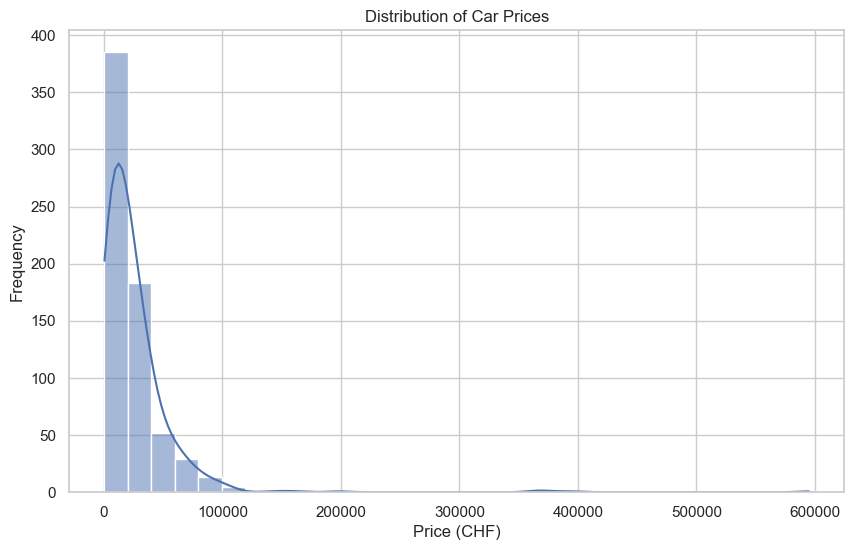

In [48]:
# 1. Distribution of Car Prices
plt.figure(figsize=(10, 6))
sns.histplot(df["Price"], kde=True, bins=30)
plt.title("Distribution of Car Prices")
plt.xlabel("Price (CHF)")
plt.ylabel("Frequency")
plt.show()


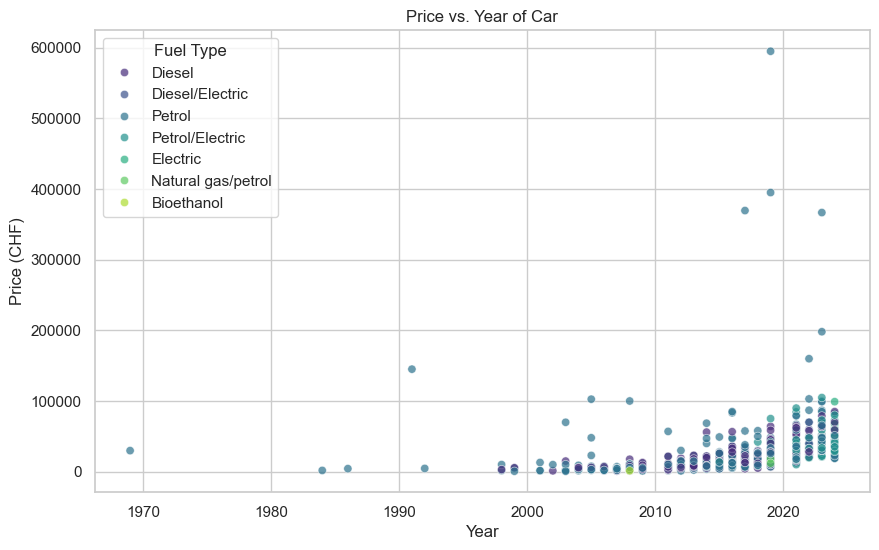

In [49]:
# 2. Year vs Price Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Year", y="Price", hue="Fuel Type", palette="viridis", alpha=0.7)
plt.title("Price vs. Year of Car")
plt.xlabel("Year")
plt.ylabel("Price (CHF)")
plt.legend(title="Fuel Type")
plt.show()

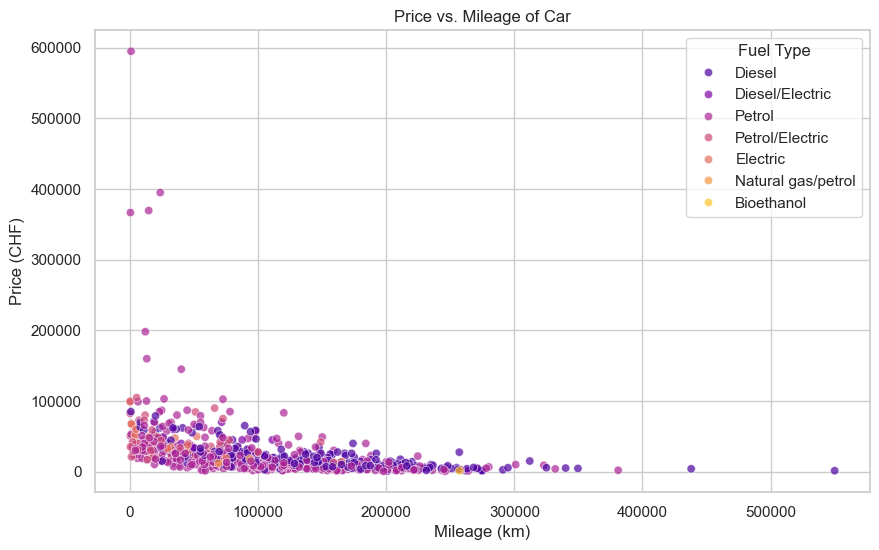

In [50]:
# 3. Mileage vs Price Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Mileage", y="Price", hue="Fuel Type", palette="plasma", alpha=0.7)
plt.title("Price vs. Mileage of Car")
plt.xlabel("Mileage (km)")
plt.ylabel("Price (CHF)")
plt.legend(title="Fuel Type")
plt.show()

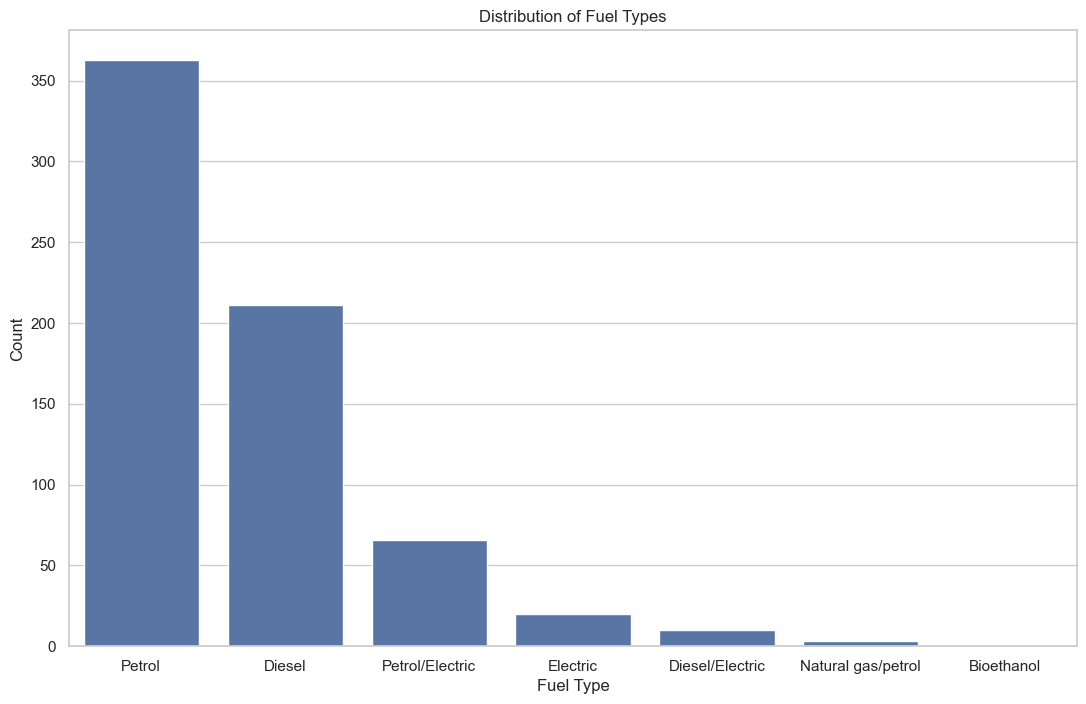

In [51]:
# 4. Fuel Type Distribution
plt.figure(figsize=(13, 8))
sns.countplot(data=df, x="Fuel Type", order=df["Fuel Type"].value_counts().index)
plt.title("Distribution of Fuel Types")
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.show()

/var/folders/j_/555m2zps099832fjh_m8jjnc0000gn/T/ipykernel_64633/2402208415.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=avg_price_by_make.index, x=avg_price_by_make.values, palette="magma")


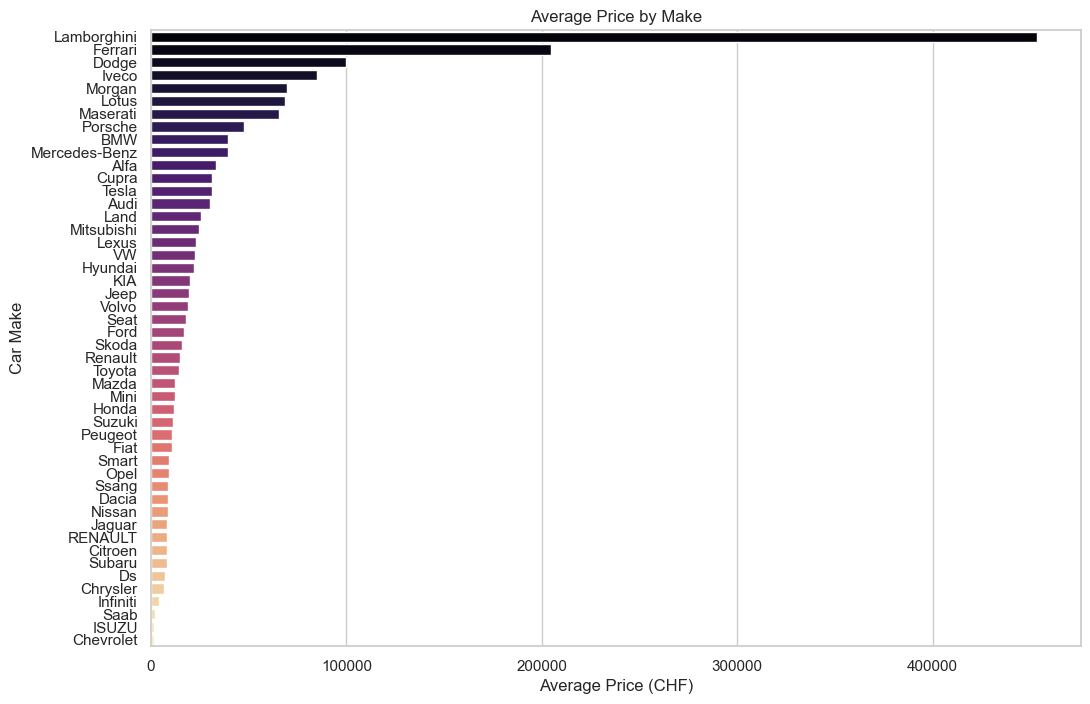

In [52]:
# 5. Average Price by Make
plt.figure(figsize=(12, 8))
avg_price_by_make = df.groupby("Make")["Price"].mean().sort_values(ascending=False)
sns.barplot(y=avg_price_by_make.index, x=avg_price_by_make.values, palette="magma")
plt.title("Average Price by Make")
plt.xlabel("Average Price (CHF)")
plt.ylabel("Car Make")
plt.show()

In [53]:
# Define the desired fuel types
desired_fuel_types = ['Petrol', 'Petrol/Electric', 'Electric']

# Filter the DataFrame to include only rows with the specified fuel types
df_filtered = df[df["Fuel Type"].isin(desired_fuel_types)].reset_index(drop=True)



In [54]:
df_filtered

,Model,Price,Year,Mileage,Fuel Type,Make
0,S3 Sportback 2.0 TFSI quattro,16960,2014,181500.0,Petrol,Audi
1,Polo 75,1500,1998,95900.0,Petrol,VW
2,500 0.9 Twinair Lounge Dualogic,6500,2017,89815.0,Petrol,Fiat
3,C1 1.0i Séduction EGS,4400,2013,64817.0,Petrol,Citroen
4,HR-V 1.5i-VTEC Executive CVT,17900,2018,108000.0,Petrol,Honda
...,...,...,...,...,...,...
444,S1 Sportback 2.0 TFSI quattro,13500,2015,202000.0,Petrol,Audi
445,C 250 AMG Line 7G-Tronic,25800,2015,43000.0,Petrol,Mercedes-Benz
446,LS 430 Automatic,22900,2005,85900.0,Petrol,Lexus
447,Leon 1.4 TSI FR,7900,2014,172700.0,Petrol,Seat


In [57]:
df_filtered = df_filtered[df_filtered["Price"] <= 25000].reset_index(drop=True)
df_filtered = df_filtered[df_filtered["Year"] >= 2010].reset_index(drop=True)
df_filtered = df_filtered[df_filtered["Mileage"] <= 150000].reset_index(drop=True)


In [58]:
df_filtered

,Model,Price,Year,Mileage,Fuel Type,Make
0,500 0.9 Twinair Lounge Dualogic,6500,2017,89815.0,Petrol,Fiat
1,C1 1.0i Séduction EGS,4400,2013,64817.0,Petrol,Citroen
2,HR-V 1.5i-VTEC Executive CVT,17900,2018,108000.0,Petrol,Honda
3,A3 Sportback 1.4 TFSI Ambiente,17400,2015,71600.0,Petrol,Audi
4,Caddy Maxi 1.2 TSI,8700,2011,77942.0,Petrol,VW
...,...,...,...,...,...,...
165,Ignis 1.2i Generation Top Hybrid,16990,2021,13500.0,Petrol/Electric,Suzuki
166,HR-V 1.5i-VTEC Elegance CVT,20550,2021,62700.0,Petrol,Honda
167,Rapid Spaceback 1.4 TSI Monte Carlo DSG,12500,2016,120000.0,Petrol,Skoda
168,Transit Connect Van T210 1.0 EcoBoost Trend,17800,2021,19850.0,Petrol,Ford


In [62]:
df = df_filtered.copy()

In [63]:
df.describe()

,Price,Year,Mileage
count,170.000000,170.000000,170.000000
mean,14088.170588,2016.841176,77542.464706
std,6197.259784,3.348330,38031.709316
min,1350.000000,2011.000000,1000.000000
25%,8549.250000,2014.000000,48050.000000
50%,14050.000000,2017.000000,77971.000000
75%,19375.000000,2019.000000,107250.000000
max,24950.000000,2024.000000,147900.000000


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Model      170 non-null    object 
 1   Price      170 non-null    int64  
 2   Year       170 non-null    int64  
 3   Mileage    170 non-null    float64
 4   Fuel Type  170 non-null    object 
 5   Make       170 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 8.1+ KB


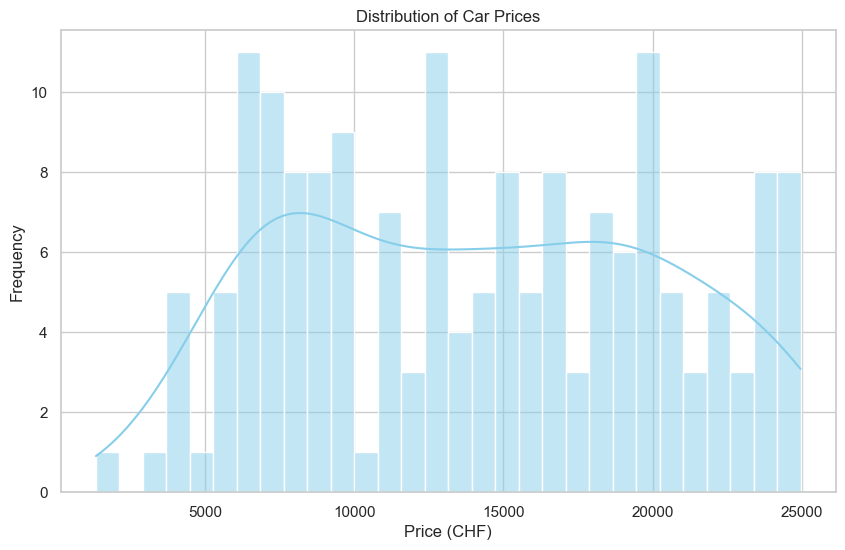

In [65]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Car Prices')
plt.xlabel('Price (CHF)')
plt.ylabel('Frequency')
plt.show()

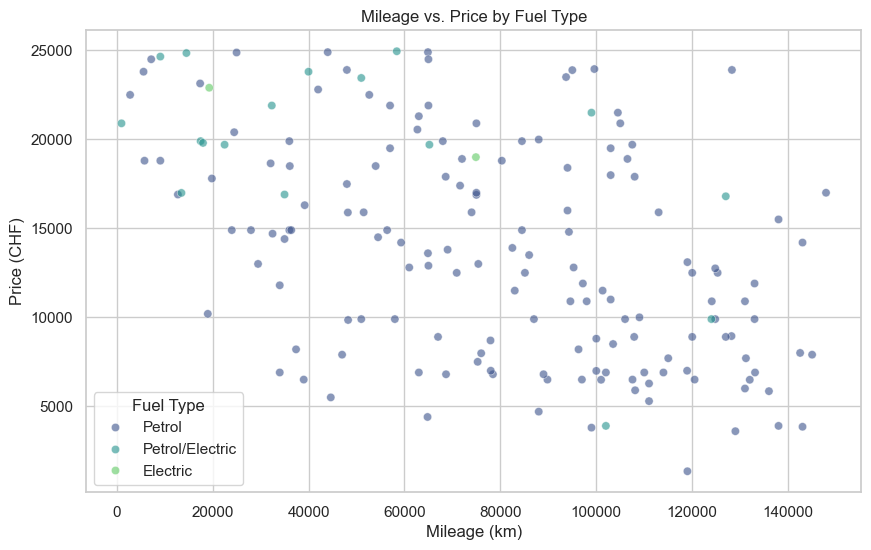

In [66]:
# 2. Mileage vs. Price Scatter Plot by Fuel Type
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Mileage', y='Price', hue='Fuel Type', palette='viridis', alpha=0.6)
plt.title('Mileage vs. Price by Fuel Type')
plt.xlabel('Mileage (km)')
plt.ylabel('Price (CHF)')
plt.legend(title='Fuel Type')
plt.show()

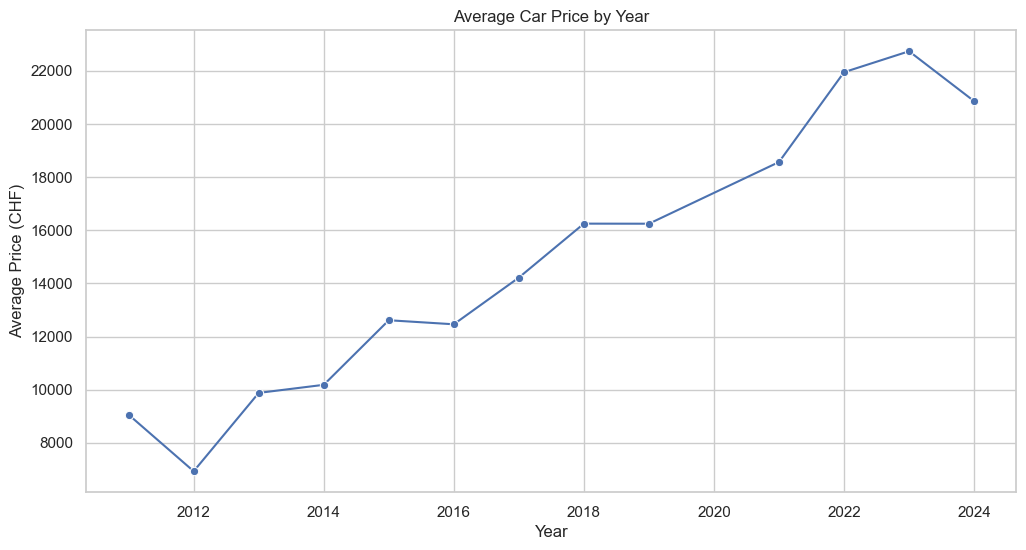

In [67]:
# 3. Average Price by Year
plt.figure(figsize=(12, 6))
sns.lineplot(data=df.groupby('Year')['Price'].mean().reset_index(), x='Year', y='Price', marker='o')
plt.title('Average Car Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Price (CHF)')
plt.show()

/var/folders/j_/555m2zps099832fjh_m8jjnc0000gn/T/ipykernel_64633/3141313728.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_makes.index, y=top_makes.values, palette='Paired')


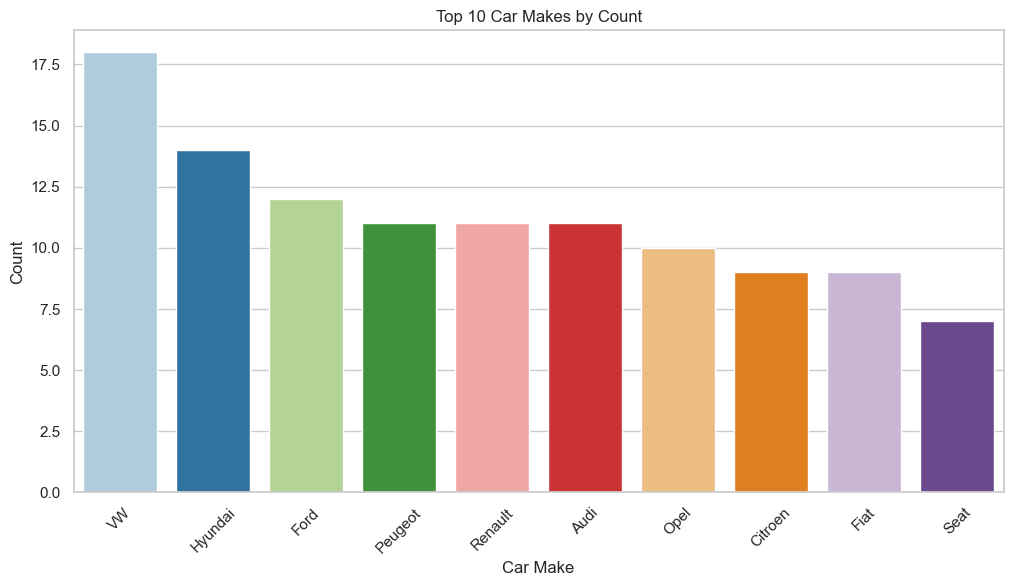

In [68]:
# 4. Number of Cars by Make
plt.figure(figsize=(12, 6))
top_makes = df['Make'].value_counts().head(10)  # Top 10 makes
sns.barplot(x=top_makes.index, y=top_makes.values, palette='Paired')
plt.title('Top 10 Car Makes by Count')
plt.xlabel('Car Make')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

/var/folders/j_/555m2zps099832fjh_m8jjnc0000gn/T/ipykernel_64633/3834803405.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Fuel Type', y='Price', palette='coolwarm')


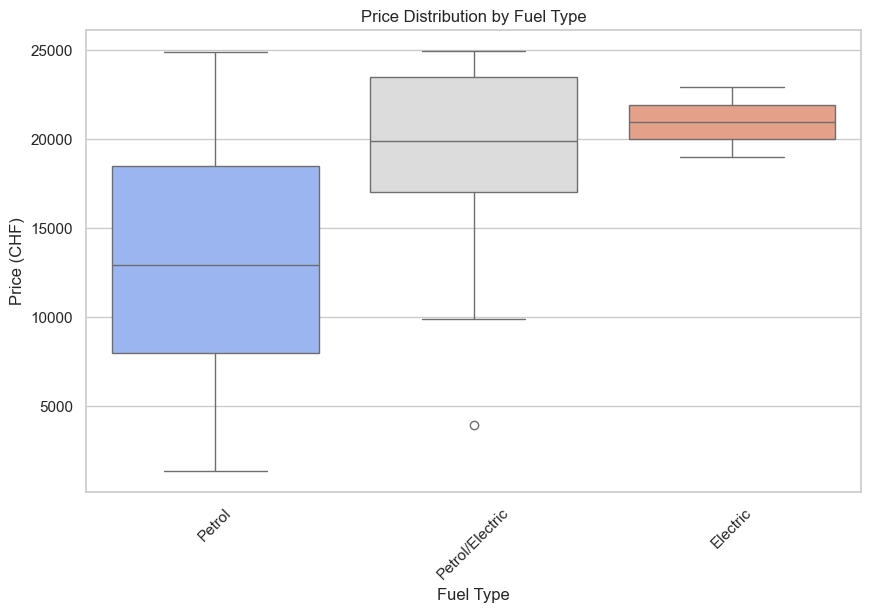

In [69]:
# 5. Average Price by Fuel Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Fuel Type', y='Price', palette='coolwarm')
plt.title('Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price (CHF)')
plt.xticks(rotation=45)
plt.show()

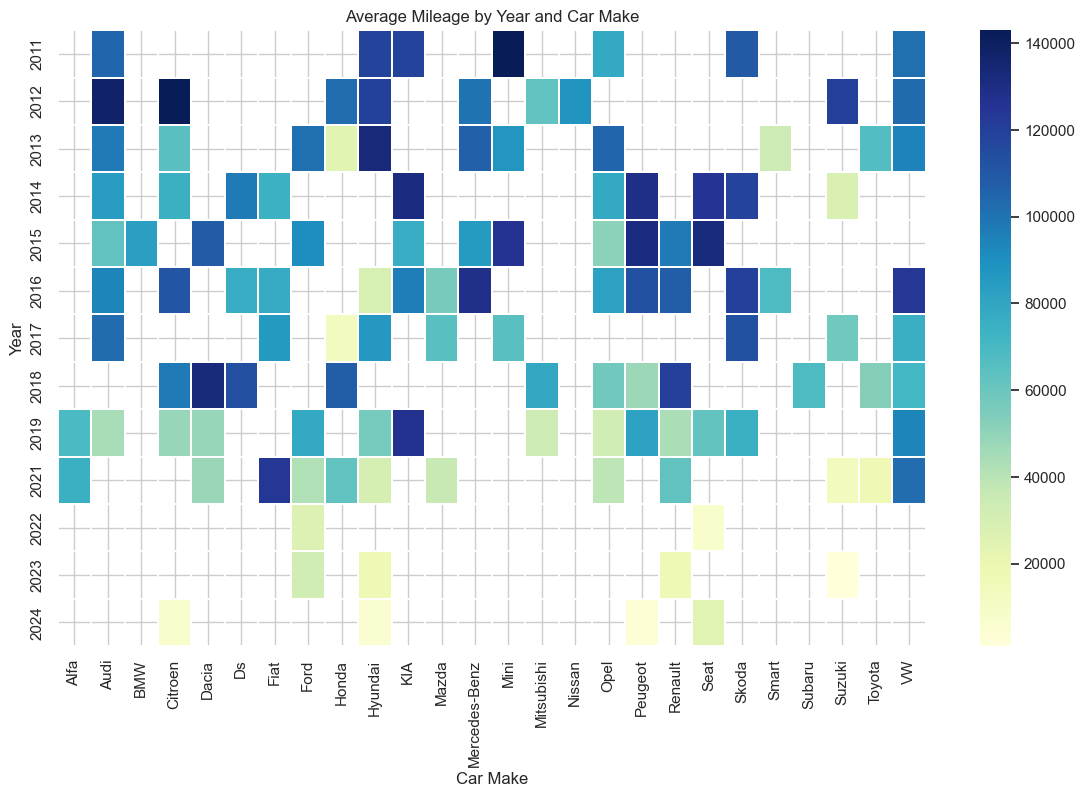

In [70]:
# 6. Mileage by Year for Cars of Different Makes (Heatmap)
plt.figure(figsize=(14, 8))
make_year_mileage = df.pivot_table(values='Mileage', index='Year', columns='Make', aggfunc='mean')
sns.heatmap(make_year_mileage, cmap='YlGnBu', linecolor='white', linewidths=0.1)
plt.title('Average Mileage by Year and Car Make')
plt.xlabel('Car Make')
plt.ylabel('Year')
plt.show()


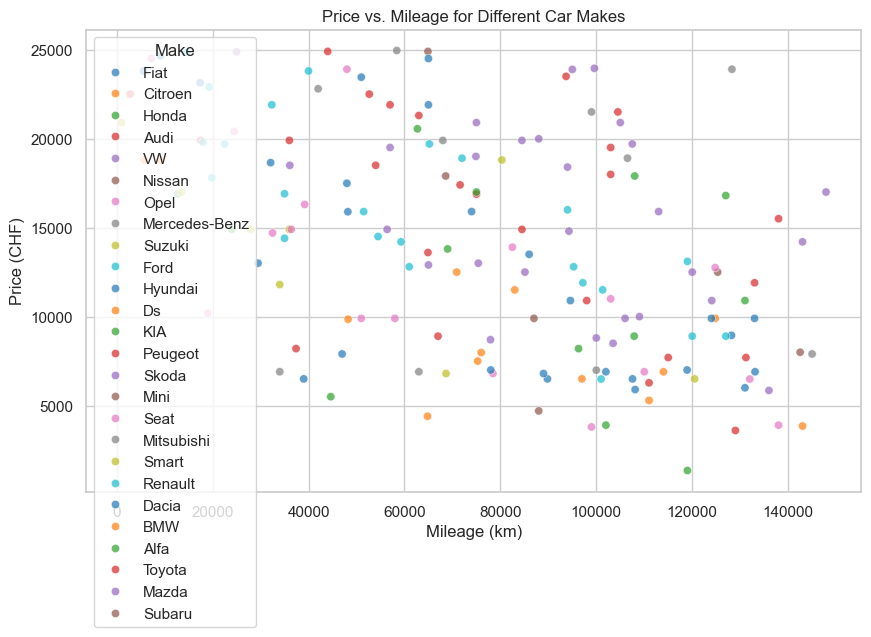

In [71]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Mileage', y='Price', hue='Make', palette='tab10', alpha=0.7)
plt.title('Price vs. Mileage for Different Car Makes')
plt.xlabel('Mileage (km)')
plt.ylabel('Price (CHF)')
plt.legend(title='Make')
plt.show()


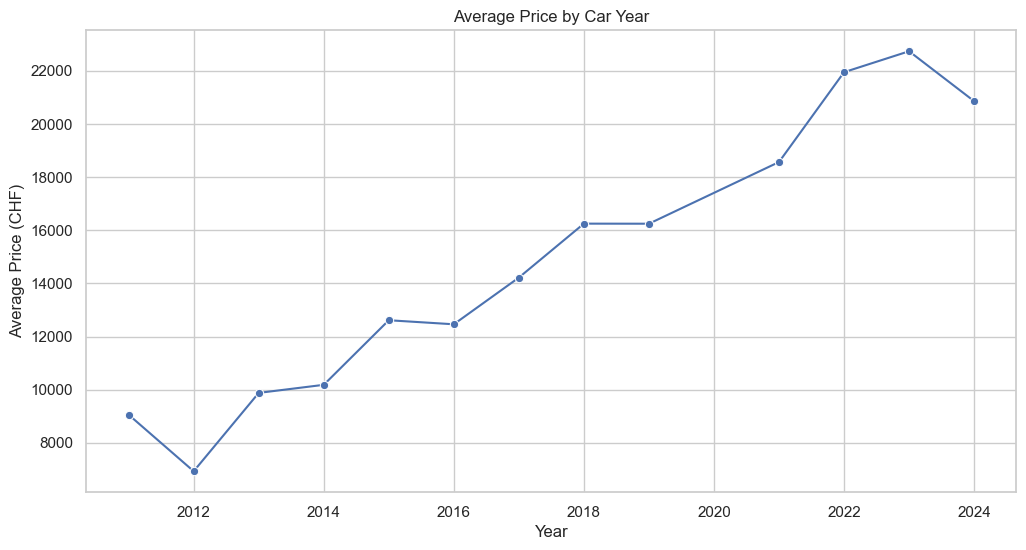

In [72]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df.groupby('Year')['Price'].mean().reset_index(), x='Year', y='Price', marker='o', color='b')
plt.title('Average Price by Car Year')
plt.xlabel('Year')
plt.ylabel('Average Price (CHF)')
plt.show()


/var/folders/j_/555m2zps099832fjh_m8jjnc0000gn/T/ipykernel_64633/1472660928.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Fuel Type', y='Mileage', palette='pastel')


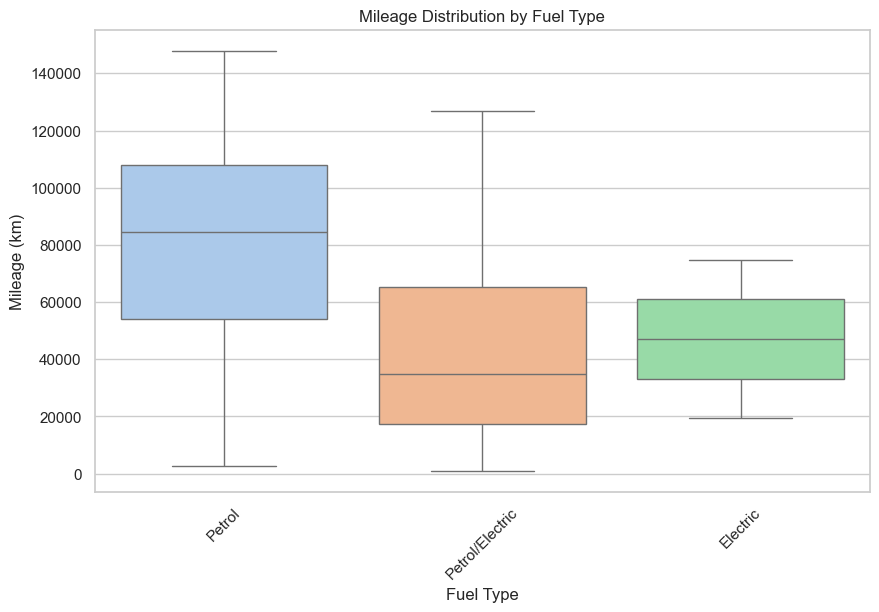

In [73]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Fuel Type', y='Mileage', palette='pastel')
plt.title('Mileage Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Mileage (km)')
plt.xticks(rotation=45)
plt.show()


/var/folders/j_/555m2zps099832fjh_m8jjnc0000gn/T/ipykernel_64633/3418103955.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Make', y='Price', palette='coolwarm', showfliers=False)


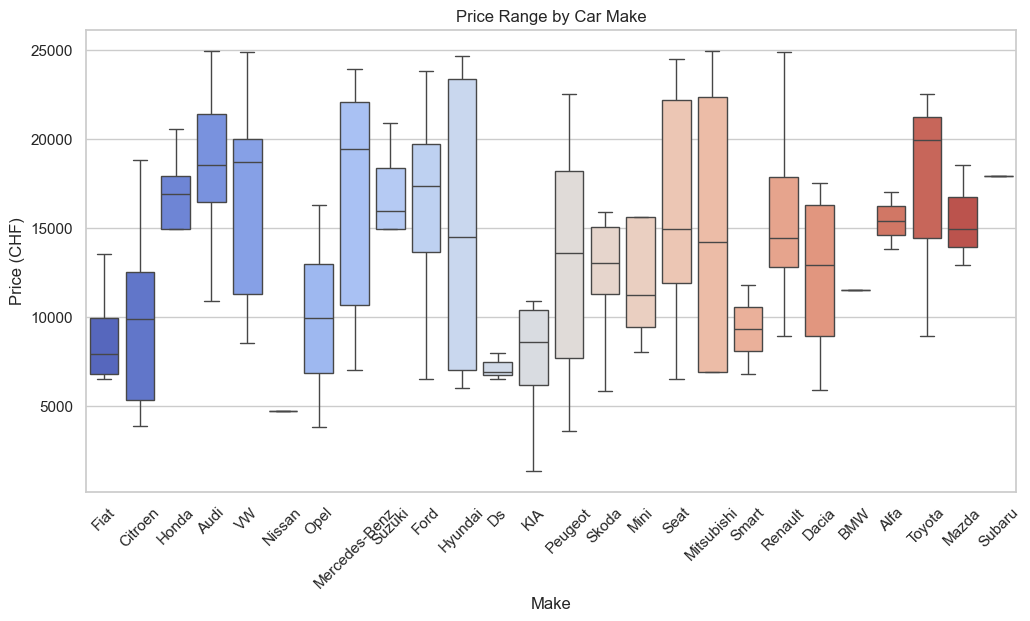

In [74]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Make', y='Price', palette='coolwarm', showfliers=False)
plt.title('Price Range by Car Make')
plt.xlabel('Make')
plt.ylabel('Price (CHF)')
plt.xticks(rotation=45)
plt.show()


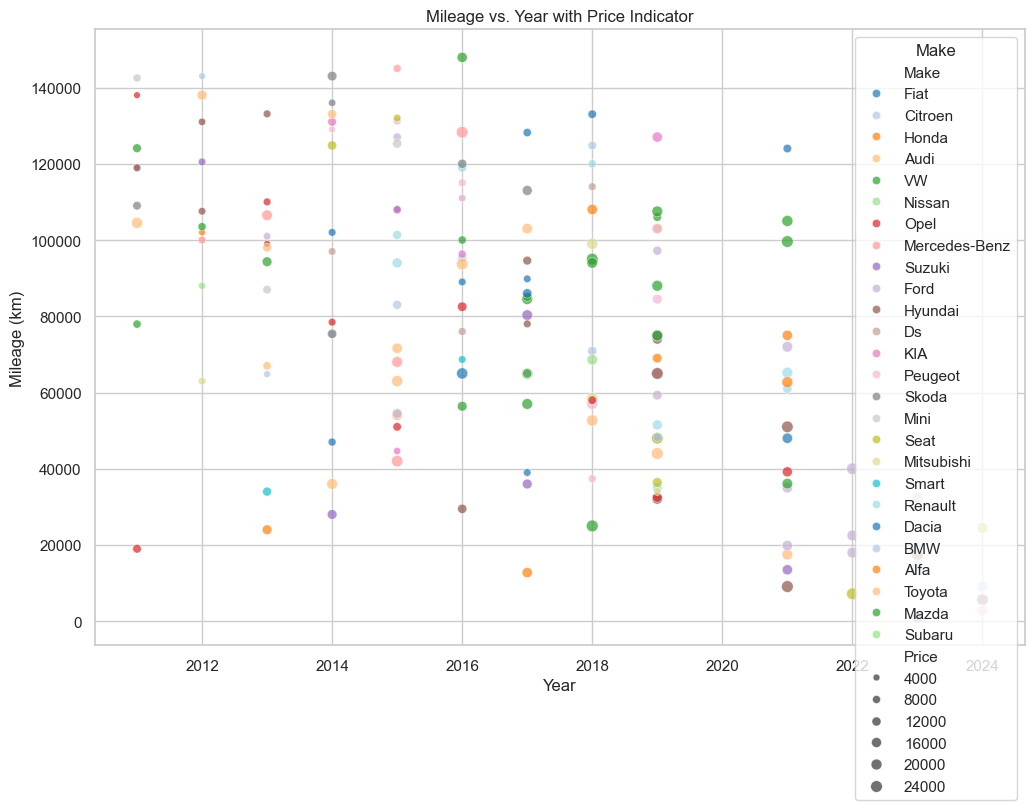

In [75]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Year', y='Mileage', size='Price', hue='Make', palette='tab20', alpha=0.7)
plt.title('Mileage vs. Year with Price Indicator')
plt.xlabel('Year')
plt.ylabel('Mileage (km)')
plt.legend(title='Make')
plt.show()


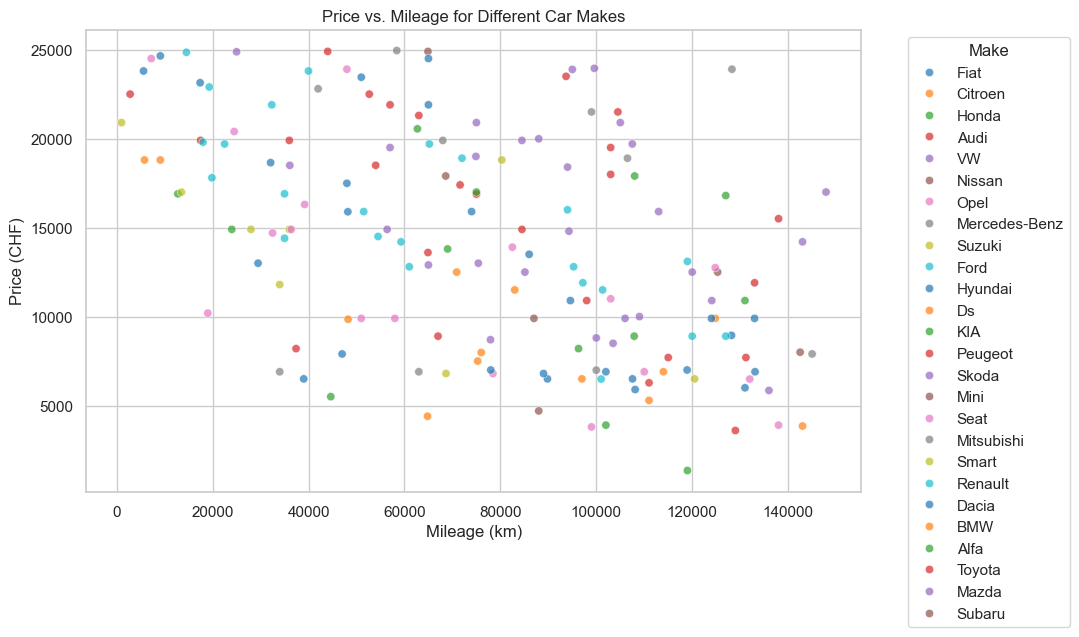

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Mileage', y='Price', hue='Make', palette='tab10', alpha=0.7)
plt.title('Price vs. Mileage for Different Car Makes')
plt.xlabel('Mileage (km)')
plt.ylabel('Price (CHF)')

# Place the legend outside of the plot area
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [78]:
df['Make'].unique()

array(['Fiat', 'Citroen', 'Honda', 'Audi', 'VW', 'Nissan', 'Opel',
       'Mercedes-Benz', 'Suzuki', 'Ford', 'Hyundai', 'Ds', 'KIA',
       'Peugeot', 'Skoda', 'Mini', 'Seat', 'Mitsubishi', 'Smart',
       'Renault', 'Dacia', 'BMW', 'Alfa', 'Toyota', 'Mazda', 'Subaru'],
      dtype=object)

In [79]:
# Ensure that Mileage has no zero values to avoid division errors
df = df[df['Mileage'] > 0]  # This will drop rows with Mileage equal to 0, if any

# Calculate Price_per_km
df['Price_per_km'] = df['Price'] / df['Mileage']



In [80]:
df

,Model,Price,Year,Mileage,Fuel Type,Make,Price_per_km
0,500 0.9 Twinair Lounge Dualogic,6500,2017,89815.0,Petrol,Fiat,0.072371
1,C1 1.0i Séduction EGS,4400,2013,64817.0,Petrol,Citroen,0.067883
2,HR-V 1.5i-VTEC Executive CVT,17900,2018,108000.0,Petrol,Honda,0.165741
3,A3 Sportback 1.4 TFSI Ambiente,17400,2015,71600.0,Petrol,Audi,0.243017
4,Caddy Maxi 1.2 TSI,8700,2011,77942.0,Petrol,VW,0.111621
...,...,...,...,...,...,...,...
165,Ignis 1.2i Generation Top Hybrid,16990,2021,13500.0,Petrol/Electric,Suzuki,1.258519
166,HR-V 1.5i-VTEC Elegance CVT,20550,2021,62700.0,Petrol,Honda,0.327751
167,Rapid Spaceback 1.4 TSI Monte Carlo DSG,12500,2016,120000.0,Petrol,Skoda,0.104167
168,Transit Connect Van T210 1.0 EcoBoost Trend,17800,2021,19850.0,Petrol,Ford,0.896725


In [81]:
# Sort the DataFrame by Price_per_km in ascending order
df = df.sort_values(by='Price_per_km', ascending=True)


In [82]:
df

,Model,Price,Year,Mileage,Fuel Type,Make,Price_per_km
48,Picanto 1.0 _seven,1350,2011,119000.0,Petrol,KIA,0.011345
75,C5 Berline 1.6 Turbo Exclusive Automatic,3850,2012,143000.0,Petrol,Citroen,0.026923
136,208 1.2 VTI Active,3600,2014,129000.0,Petrol,Peugeot,0.027907
138,Corsa 1.4 TP Enjoy,3900,2011,138000.0,Petrol,Opel,0.028261
50,CR-Z 1.5i Hybrid GT Plus,3900,2012,102000.0,Petrol/Electric,Honda,0.038235
...,...,...,...,...,...,...,...
87,C3 Aircross 1.2i PureTech Max EAT6,18800,2024,5800.0,Petrol,Citroen,3.241379
73,Arona 1.5 Eco TSI Hola Xperience DSG,24500,2022,7200.0,Petrol,Seat,3.402778
89,Kona KONA 1.0 T-GDi Advanced 2WD DCT-Automat,23800,2024,5600.0,Petrol,Hyundai,4.250000
90,2008 1.2 PureTech Allure,22500,2024,2800.0,Petrol,Peugeot,8.035714


In [83]:
df_petrol_electric = df[df['Fuel Type'] == 'Petrol/Electric']

In [84]:
df_petrol_electric

,Model,Price,Year,Mileage,Fuel Type,Make,Price_per_km
50,CR-Z 1.5i Hybrid GT Plus,3900,2012,102000.0,Petrol/Electric,Honda,0.038235
107,500 1.0 N3 MildHybrid Cult,9900,2021,124000.0,Petrol/Electric,Fiat,0.079839
46,Niro 1.6GDi Plug-in Hybrid DCT,16800,2019,127000.0,Petrol/Electric,KIA,0.132283
62,Outlander 2.4 PHEV Style 4WD Automatic,21500,2018,99000.0,Petrol/Electric,Mitsubishi,0.217172
33,Captur 1.3 TCe Techno EDC,19700,2021,65200.0,Petrol/Electric,Renault,0.302147
27,Outlander 2.4 PHEV Diamond S-Edition 4WD Autom...,24950,2018,58400.0,Petrol/Electric,Mitsubishi,0.427226
114,Kona 1.6 GDi HEV Origo DCT,23450,2021,51000.0,Petrol/Electric,Hyundai,0.459804
70,Fiesta 1.0 SCTi MHEV ST Line X Automat,16900,2021,35000.0,Petrol/Electric,Ford,0.482857
13,Puma 1.0 MHEV ST-Line X Automat,23800,2022,40000.0,Petrol/Electric,Ford,0.595000
103,Fiesta 1.0 SCTi MHEV ST Line Automat,21900,2023,32340.0,Petrol/Electric,Ford,0.677180


In [85]:
df_petrol_electric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 50 to 96
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Model         17 non-null     object 
 1   Price         17 non-null     int64  
 2   Year          17 non-null     int64  
 3   Mileage       17 non-null     float64
 4   Fuel Type     17 non-null     object 
 5   Make          17 non-null     object 
 6   Price_per_km  17 non-null     float64
dtypes: float64(2), int64(2), object(3)
memory usage: 1.1+ KB


In [86]:
df_petrol_electric

,Model,Price,Year,Mileage,Fuel Type,Make,Price_per_km
50,CR-Z 1.5i Hybrid GT Plus,3900,2012,102000.0,Petrol/Electric,Honda,0.038235
107,500 1.0 N3 MildHybrid Cult,9900,2021,124000.0,Petrol/Electric,Fiat,0.079839
46,Niro 1.6GDi Plug-in Hybrid DCT,16800,2019,127000.0,Petrol/Electric,KIA,0.132283
62,Outlander 2.4 PHEV Style 4WD Automatic,21500,2018,99000.0,Petrol/Electric,Mitsubishi,0.217172
33,Captur 1.3 TCe Techno EDC,19700,2021,65200.0,Petrol/Electric,Renault,0.302147
27,Outlander 2.4 PHEV Diamond S-Edition 4WD Autom...,24950,2018,58400.0,Petrol/Electric,Mitsubishi,0.427226
114,Kona 1.6 GDi HEV Origo DCT,23450,2021,51000.0,Petrol/Electric,Hyundai,0.459804
70,Fiesta 1.0 SCTi MHEV ST Line X Automat,16900,2021,35000.0,Petrol/Electric,Ford,0.482857
13,Puma 1.0 MHEV ST-Line X Automat,23800,2022,40000.0,Petrol/Electric,Ford,0.595000
103,Fiesta 1.0 SCTi MHEV ST Line Automat,21900,2023,32340.0,Petrol/Electric,Ford,0.677180
